# Dominant color extraction for image segmentation

In [2]:
import cv2
import matplotlib.pyplot as plt

In [31]:
im=cv2.imread('obama.jpg')    ##its read the image as BGR format
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape=im.shape
print(im.shape)

(3356, 2687, 3)


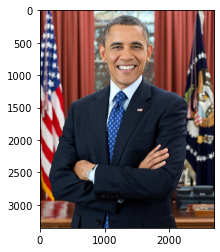

In [32]:
plt.imshow(im)
plt.show()

In [33]:
## Flattern each channel of the images
all_pixels=im.reshape((-1,3))
print(all_pixels.shape)
#making its linear

(9017572, 3)


In [34]:
from sklearn.cluster import KMeans

In [35]:
dominant_color=4

km=KMeans(n_clusters=dominant_color)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [36]:
centres=km.cluster_centers_
import numpy as np

In [37]:
centres=np.array(centres,dtype='uint8')

In [38]:
print(centres)

[[ 23  28  42]
 [177 130 114]
 [132  65  55]
 [204 206 206]]


In [39]:
#plot all colors are these?

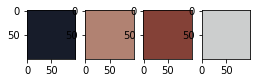

In [40]:
i=1
colors=[]
plt.figure(0,figsize=(4,2))
for each_col in centres:
    plt.subplot(1,4,i)
    i+=1
    
    colors.append(each_col)
    
    #color swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

## Segmentation our original Image

In [41]:
new_img=np.zeros((3356*2687,3),dtype='uint8')

In [42]:
print(new_img.shape)

(9017572, 3)


In [43]:
colors

[array([23, 28, 42], dtype=uint8),
 array([177, 130, 114], dtype=uint8),
 array([132,  65,  55], dtype=uint8),
 array([204, 206, 206], dtype=uint8)]

In [44]:
km.labels_

array([2, 2, 2, ..., 2, 2, 2])

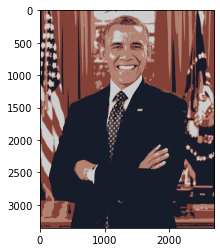

In [45]:
for ix in range(new_img.shape[0]):
    new_img[ix]= colors[km.labels_[ix]]
new_img=new_img.reshape((original_shape))


plt.imshow(new_img)
plt.show()

### done done